# Generate Descriptive Statistics Graphs, ACF, etc...

In this notebook we generate the graphs for the thesis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from libraries.Cryptov2 import Cryptocurrency
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
%matplotlib inline

In [5]:
# We import our cryptocurrencies
BTC = Cryptocurrency('BTC', data='./data/gen/BTC-generated.csv')
IOTA = Cryptocurrency('IOTA', data='./data/gen/IOTA-generated.csv')
ETH = Cryptocurrency('ETH', data='./data/gen/ETH-generated.csv')
EOS = Cryptocurrency('EOS', data='./data/gen/EOS-generated.csv')

Cryptocurrency V.0.3
Data for BTC already exists.
Reading...
Done! 2345 rows and 34 columns
Cryptocurrency V.0.3
Data for IOTA already exists.
Reading...
Done! 838 rows and 34 columns
Cryptocurrency V.0.3
Data for ETH already exists.
Reading...
Done! 1514 rows and 34 columns
Cryptocurrency V.0.3
Data for EOS already exists.
Reading...
Done! 820 rows and 34 columns


In [6]:
BTC.data['log_returns'].describe()

count    2345.000000
mean        0.001727
std         0.043133
min        -0.266198
25%        -0.012490
50%         0.001917
75%         0.018454
max         0.357451
Name: log_returns, dtype: float64

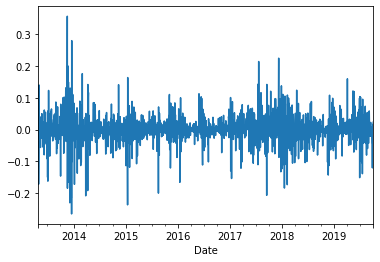

In [7]:
BTC.data['log_returns'].plot()

In [1]:
def plot_RSI(crypto, start=0, end=700, lim=(20,80)):
    """Functions which plots the RSI provided a crypto
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    # If the end index is bigger than the index itself
    if end > len(crypto.data['close']):
        end = len(crypto.data['close']-1)
        
    # Starting index vs ending index
    start_date = crypto.data.index[start].strftime("%d-%b-%Y")
    end_date = crypto.data.index[end].strftime("%d-%b-%Y")
    
    # We plot the series 
    t = crypto.data.iloc[start:end].index
    s1 = crypto.data['close'].iloc[start:end]
    s2 = crypto.data['boll_bands_upper_band'].iloc[start:end]
    s3 = crypto.data['boll_bands_lower_band'].iloc[start:end]
    s4 = crypto.data['rsi'].iloc[start:end]

    fig, axs = plt.subplots(2, 1, figsize=(30,20))
    axs[0].set_title('{0} Close {1} to {2}'.format(crypto.name, start_date, end_date))
    axs[0].plot(t, s1, label='Close')
    axs[0].plot(t, s2, label='BB up')
    axs[0].plot(t, s3, label='BB down')
    axs[0].set_xlabel('time')
    axs[0].set_ylabel('Close')
    axs[0].grid(True)
    axs[0].legend()

    axs[1].plot(t, s4)
    # Overbought line
    axs[1].axhline(y=lim[1], c='r')
    axs[1].fill_between(t, lim[1], s4, where=s4>lim[1], color='r')

    # Oversold line
    axs[1].axhline(y=lim[0], c='g')
    axs[1].fill_between(t, lim[0], s4, where=s4<lim[0],  color='g')
    axs[1].set_ylabel('RSI')
    axs[1].grid(True)


    fig.tight_layout()
    plt.show()

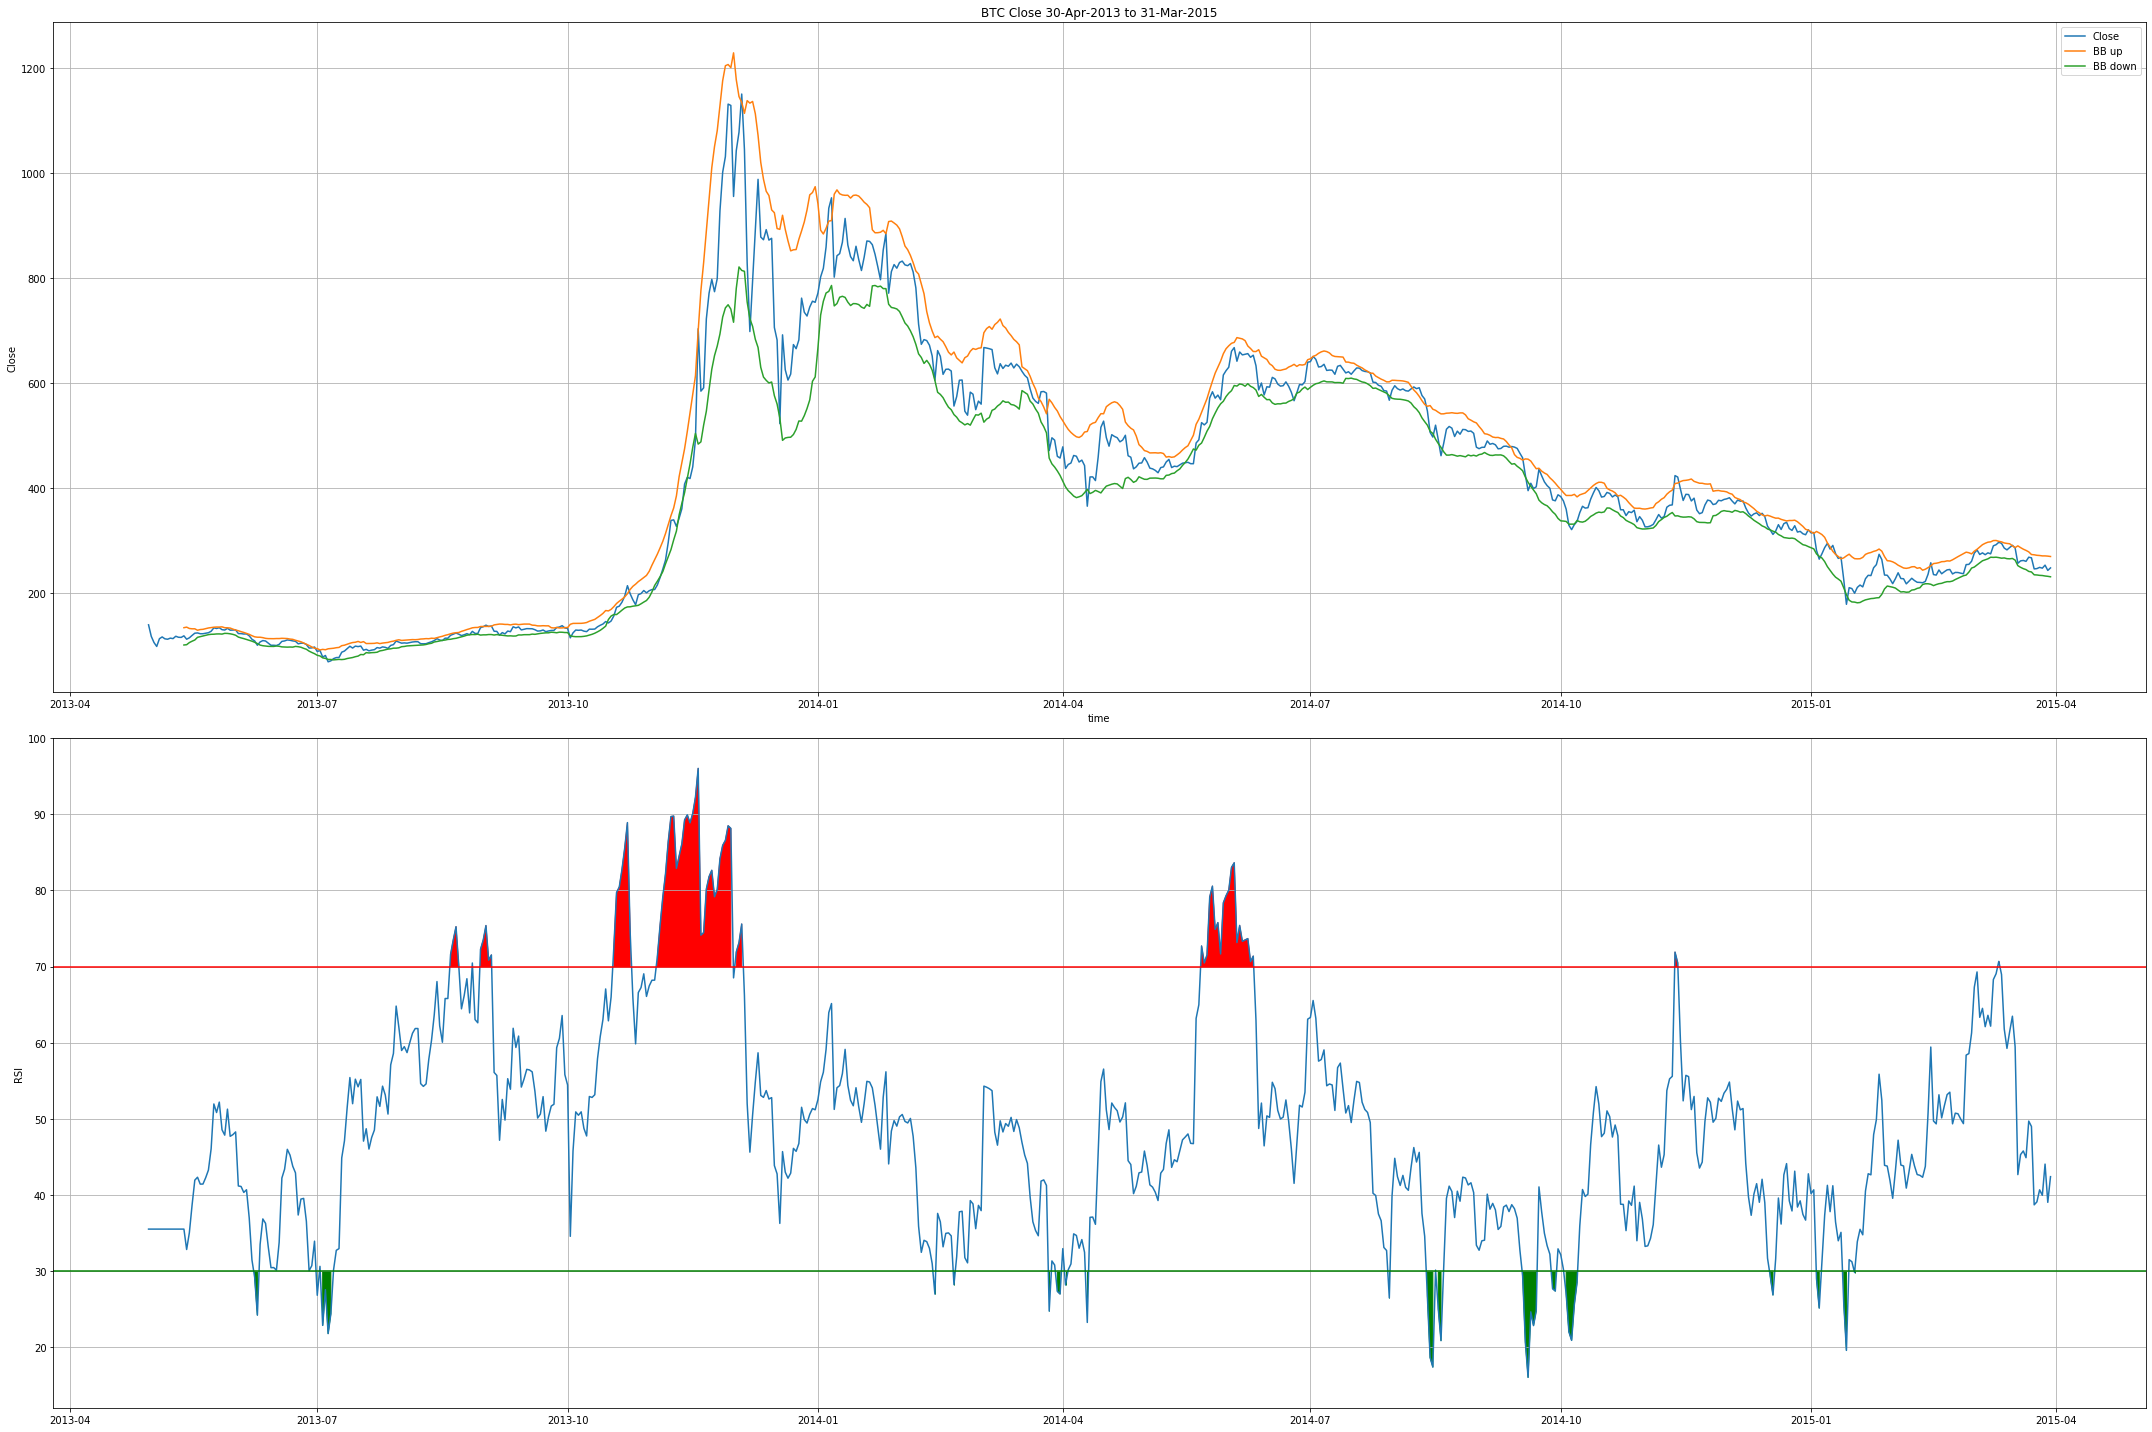

In [9]:
plot_RSI(BTC, lim=(30,70))

In [2]:
def plot_all_crypto(crypto_list, column_list, save_fig=False, sharex=False):
    """ Plot all cryptocurrencies to compare them provided a list of colums of interest
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import math
           
    idx_col = 0
    idx_row = 0
    end_date = '2019-09-30'
    rows = 4
    cols  = 1
        
    fig, axs = plt.subplots(rows, cols, figsize=(10,rows*3), sharex=sharex)
    crypto_idx = 0
    
    for idx_row in range(rows):
        # We plot the series 
        # Starting index vs ending index

        for col in column_list:
            
            # Starting index vs ending index
            start_date = crypto_list[crypto_idx].data.index[0].strftime("%d-%m-%Y")
            t = crypto_list[crypto_idx].data.index
            axs[idx_row].plot(t, crypto_list[crypto_idx].data[col], label=col)
            axs[idx_row].set_ylabel(col)
            axs[idx_row].set_title(f'{crypto_list[crypto_idx].name} comparison {start_date} to {end_date}')

        axs[idx_row].set_xlabel('time')
        axs[idx_row].grid(True)
        axs[idx_row].legend()
        crypto_idx += 1
        
    filename = ''.join(f'{str(e)}-' for e in column_list)
    filename = filename[:len(filename)-1]
    filename = filename.lower().replace('_','-')
    
    fig.tight_layout()
    if save_fig:
        plt.savefig(f"./figs/stats/{filename}-comparison.png")
    plt.show()

In [11]:
IOTA.data.index[0].strftime("%d-%m-%Y")

'15-06-2017'

In [51]:
def hist_all_crypto(crypto_list, column, save_fig=False):
    """ Plot all cryptocurrencies to compare them provided a list of colums of interest
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import math
    
    # Starting index vs ending index
    end_date = '2019-09-30'
    
    idx_col = 0
    idx_row = 0
    
    rows = math.ceil(len(crypto_list) / 2) 
    cols  = len(crypto_list) // 2
        
    fig, axs = plt.subplots(rows, cols, figsize=(15,rows*5))
    crypto_idx = 0
    
    for idx_col in range(cols):
        for idx_row in range(rows):
            # Starting index vs ending index
            start_date = crypto_list[crypto_idx].data.index[0].strftime("%d-%m-%Y")
            
            # We plot the series 

            axs[idx_col][idx_row].hist(crypto_list[crypto_idx].data[column], bins=30, label=column)
            axs[idx_col][idx_row].set_ylabel(column)
            axs[idx_col][idx_row].set_xlabel('')
            axs[idx_col][idx_row].set_title(f'{crypto_list[crypto_idx].name} distribution {start_date} to {end_date}')
            axs[idx_col][idx_row].grid(True)
            axs[idx_col][idx_row].legend()
            crypto_idx += 1
        
    filename = column
    filename = filename.lower().replace('_','-')
    
    fig.tight_layout()
    if save_fig:
        plt.savefig(f"./figs/stats/{filename}-distribution-comparison.png")
    plt.show()

In [13]:
BTC.data.columns

Index(['open', 'high', 'low', 'close', 'market_cap', 'lagged_open',
       'lagged_close', 'log_price', 'pct_change', 'returns', 'log_returns',
       'idx', 'stdev14', 'stdev30', 'stdev60', 'hvol14', 'hvol30', 'hvol60',
       'variance14', 'variance30', 'variance60', 'sma_14', 'sma_28', 'sma_12',
       'lagged_sma_12', 'ema_12', 'sma_26', 'lagged_sma_26', 'ema_26', 'rsi',
       'macd', 'momentum', 'boll_bands_upper_band', 'boll_bands_lower_band'],
      dtype='object')

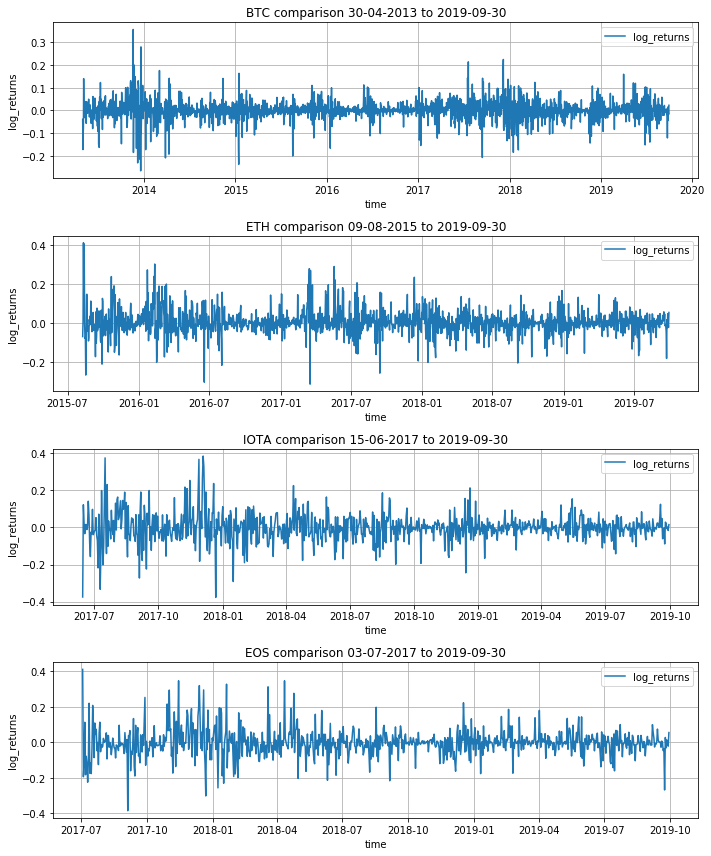

In [14]:
crypto_list = [BTC, ETH, IOTA, EOS]
plot_all_crypto(crypto_list, ['log_returns'], save_fig=True)

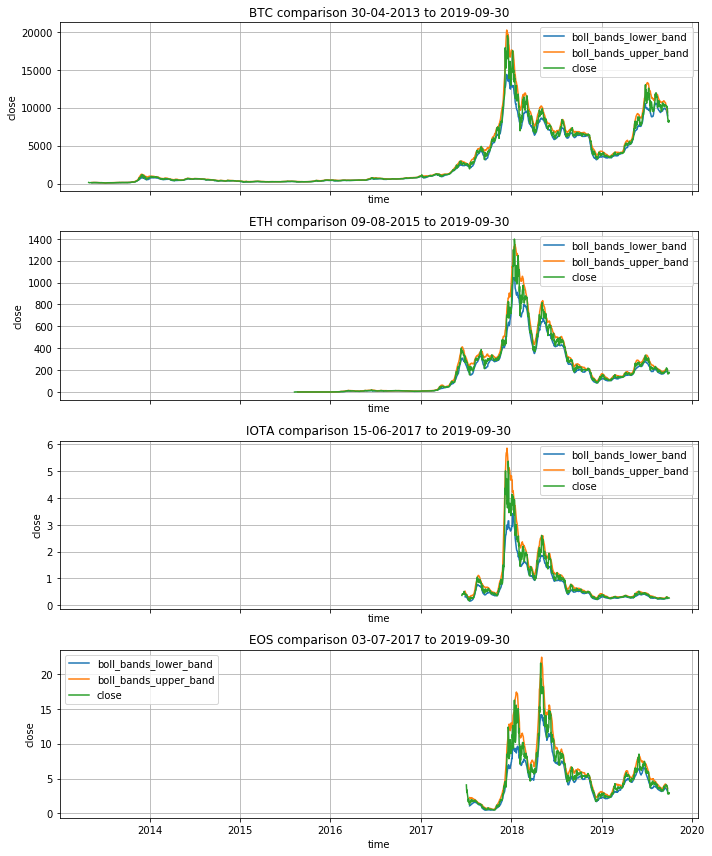

In [15]:
plot_all_crypto(crypto_list, ['boll_bands_lower_band','boll_bands_upper_band','close'], sharex=True)

In [16]:
BTC.data.columns

Index(['open', 'high', 'low', 'close', 'market_cap', 'lagged_open',
       'lagged_close', 'log_price', 'pct_change', 'returns', 'log_returns',
       'idx', 'stdev14', 'stdev30', 'stdev60', 'hvol14', 'hvol30', 'hvol60',
       'variance14', 'variance30', 'variance60', 'sma_14', 'sma_28', 'sma_12',
       'lagged_sma_12', 'ema_12', 'sma_26', 'lagged_sma_26', 'ema_26', 'rsi',
       'macd', 'momentum', 'boll_bands_upper_band', 'boll_bands_lower_band'],
      dtype='object')

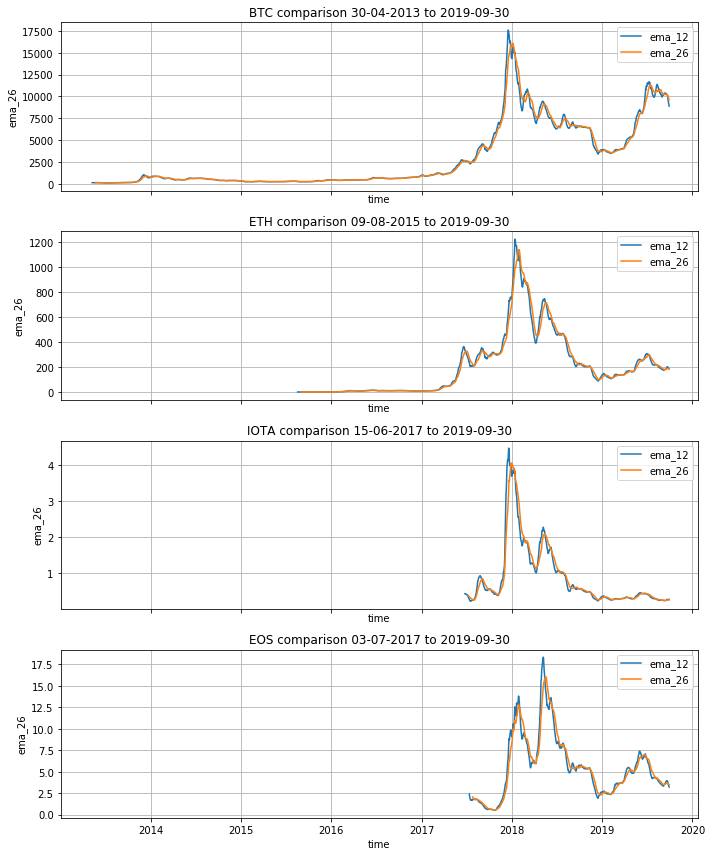

In [17]:
plot_all_crypto(crypto_list, ['ema_12', 'ema_26'], sharex=True)

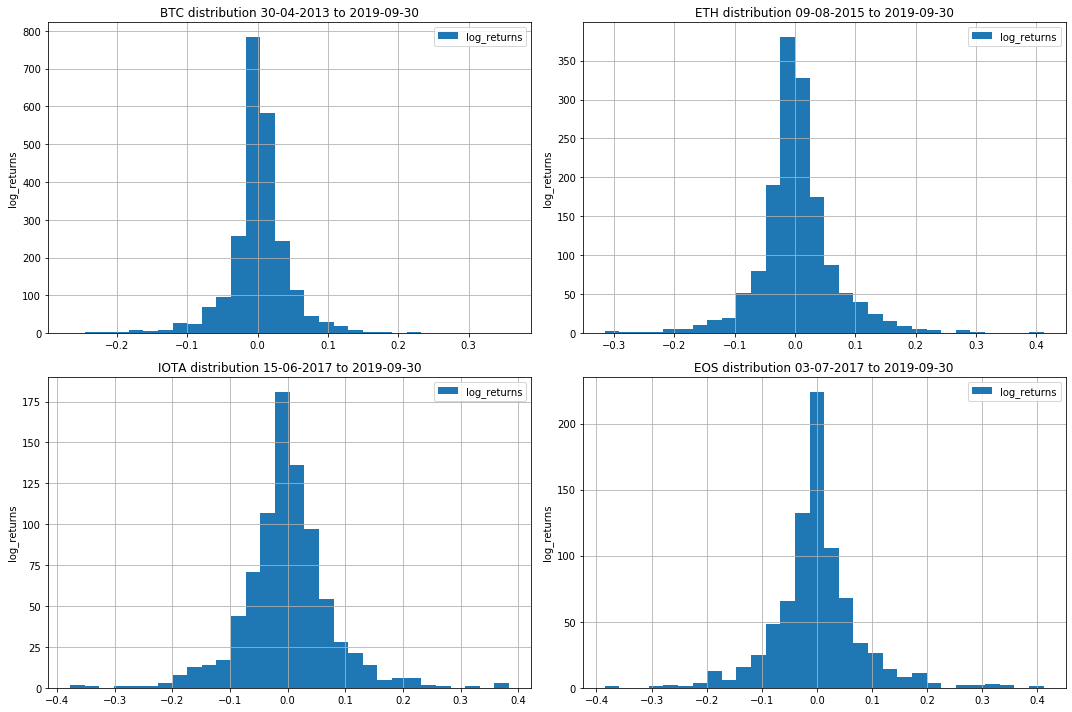

In [52]:
hist_all_crypto(crypto_list, 'log_returns', save_fig=True)

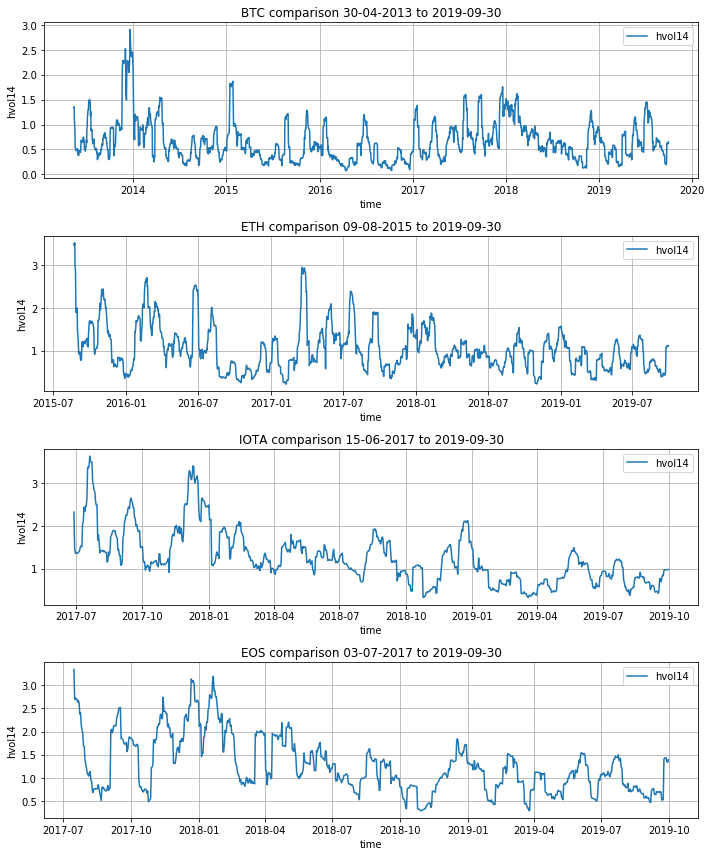

In [47]:
plot_all_crypto(crypto_list, ['hvol14'], save_fig=True)

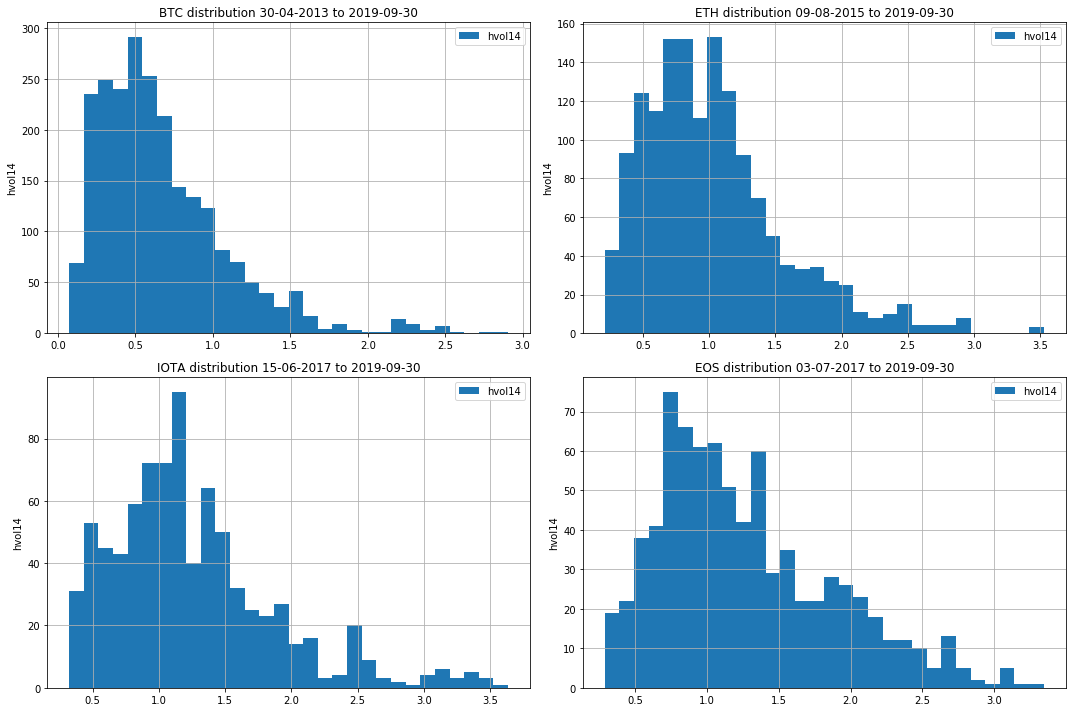

In [53]:
hist_all_crypto(crypto_list, 'hvol14', save_fig=True)

In [21]:
def get_summary(crypto_list, column_list):
    from scipy.stats import kurtosis, skew, jarque_bera, shapiro
    df = pd.DataFrame()
    lst_kurtosis = []
    lst_skew = []
    lst_jarque_bera = []
    lst_jarque_bera_p = []
    
    for crypto in crypto_list:
        for col in column_list:
            my_col = crypto.data[col].describe()
            my_data = crypto.data[col].dropna()
            lst_kurtosis.append(kurtosis(my_data))
            lst_skew.append(skew(my_data))
            lst_jarque_bera.append(jarque_bera(my_data)[0])
            lst_jarque_bera_p.append(jarque_bera(my_data)[1])
            df[f'{crypto.name}-{col}'] = my_col
    df = df.T
    df['kurtosis'] = lst_kurtosis
    df['skew'] = lst_skew
    df['JB'] = lst_jarque_bera
    df['p JB'] = lst_jarque_bera_p
    return df.T

In [22]:
crypto_list = [BTC, ETH, IOTA, EOS]

In [23]:
df_returns_and_vol = get_summary(crypto_list,['log_returns'])
df_returns_and_vol = df_returns_and_vol.round(4)
df_returns_and_vol.to_csv('./data/stats/log_returns.csv')

In [24]:
df_returns_and_vol = get_summary(crypto_list,['hvol14'])
df_returns_and_vol = df_returns_and_vol.round(4)
df_returns_and_vol.to_csv('./data/stats/daily_volatility.csv')

## P value
The level of statistical significance is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-0lax"></th>
    <th class="tg-1wig">BTC-returns</th>
    <th class="tg-1wig">ETH-returns</th>
    <th class="tg-1wig">IOTA-returns</th>
    <th class="tg-1wig">EOS-returns</th>
  </tr>
  <tr>
    <td class="tg-1wig">count</td>
    <td class="tg-0lax">2348.0</td>
    <td class="tg-0lax">1517.0</td>
    <td class="tg-0lax">841.0</td>
    <td class="tg-0lax">823.0</td>
  </tr>
  <tr>
    <td class="tg-1wig">mean</td>
    <td class="tg-0lax">0.0027</td>
    <td class="tg-0lax">0.0048</td>
    <td class="tg-0lax">0.002</td>
    <td class="tg-0lax">0.0074</td>
  </tr>
  <tr>
    <td class="tg-1wig">std</td>
    <td class="tg-0lax">0.0433</td>
    <td class="tg-0lax">0.0719</td>
    <td class="tg-0lax">0.0794</td>
    <td class="tg-0lax">0.1162</td>
  </tr>
  <tr>
    <td class="tg-1wig">min</td>
    <td class="tg-0lax">-0.2337</td>
    <td class="tg-0lax">-0.728</td>
    <td class="tg-0lax">-0.3141</td>
    <td class="tg-0lax">-0.3196</td>
  </tr>
  <tr>
    <td class="tg-1wig">25%</td>
    <td class="tg-0lax">-0.0124</td>
    <td class="tg-0lax">-0.0246</td>
    <td class="tg-0lax">-0.0372</td>
    <td class="tg-0lax">-0.0341</td>
  </tr>
  <tr>
    <td class="tg-1wig">50%</td>
    <td class="tg-0lax">0.0019</td>
    <td class="tg-0lax">-0.0008</td>
    <td class="tg-0lax">-0.0031</td>
    <td class="tg-0lax">-0.0017</td>
  </tr>
  <tr>
    <td class="tg-1wig">75%</td>
    <td class="tg-0lax">0.0187</td>
    <td class="tg-0lax">0.0292</td>
    <td class="tg-0lax">0.0358</td>
    <td class="tg-0lax">0.0323</td>
  </tr>
  <tr>
    <td class="tg-1wig">max</td>
    <td class="tg-0lax">0.4297</td>
    <td class="tg-0lax">0.5103</td>
    <td class="tg-0lax">0.4681</td>
    <td class="tg-0lax">1.6832</td>
  </tr>
  <tr>
    <td class="tg-1wig">kurtosis</td>
    <td class="tg-0lax">9.5235</td>
    <td class="tg-0lax">18.8451</td>
    <td class="tg-0lax">5.5165</td>
    <td class="tg-0lax">104.3862</td>
  </tr>
  <tr>
    <td class="tg-1wig">skew</td>
    <td class="tg-0lax">0.4784</td>
    <td class="tg-0lax">-0.433</td>
    <td class="tg-0lax">0.895</td>
    <td class="tg-0lax">7.6671</td>
  </tr>
  <tr>
    <td class="tg-1wig">JB</td>
    <td class="tg-0lax">8962.7892</td>
    <td class="tg-0lax">22495.11</td>
    <td class="tg-0lax">1178.6316</td>
    <td class="tg-0lax">381721.3585</td>
  </tr>
  <tr>
    <td class="tg-1wig">p JB</td>
    <td class="tg-0lax">0.0</td>
    <td class="tg-0lax">0.0</td>
    <td class="tg-0lax">0.0</td>
    <td class="tg-0lax">0.0</td>
  </tr>

</table>

In [25]:
def plot_real_pacf(x, crypto_name, colname, savefig=False):
    """Plot the PACF of the provided column
    """
    
    # We define the name of the figures
    column = colname.replace('_',' ').capitalize()
    
    # Compute the ACF
    data1 = pacf(x, alpha=.05,fft=False)
    confi1 = pd.DataFrame(data1[1])
    confi1.columns = ['Lower', 'Higher']
    x1 = data1[0]
    
    data2 = pacf(x**2, alpha=.05,fft=False)
    confi2 = pd.DataFrame(data2[1])
    confi2.columns = ['Lower', 'Higher']
    x2 = data2[0]
    
    data3 = pacf(np.abs(x), alpha=.05,fft=False)
    confi3 = pd.DataFrame(data3[1])
    confi3.columns = ['Lower', 'Higher']
    x3 = data3[0]
    
    t = range(0,len(acf(x)))
    
    # Plot it
    fig, ax = plt.subplots(3,1, figsize=(10,9))

    if first:
        ax[0].stem(t, x1, use_line_collection=True)
        ax[1].stem(t, x2, use_line_collection=True)
        ax[2].stem(t, x3, use_line_collection=True)
    else:
        ax[0].stem(t, x1, use_line_collection=True)
        ax[1].stem(t, x2, use_line_collection=True)
        ax[2].stem(t, x3, use_line_collection=True)
        
    ax[0].fill_between(t[1:], y1 = confi1['Lower'].to_list()[1:] - x1[1:], y2 = confi1['Higher'].to_list()[1:] - x1[1:], alpha=0.3)
    ax[1].fill_between(t[1:], y1 = confi2['Lower'].to_list()[1:] - x2[1:], y2 = confi2['Higher'].to_list()[1:] - x2[1:], alpha=0.3)
    ax[2].fill_between(t[1:], y1 = confi3['Lower'].to_list()[1:] - x3[1:], y2 = confi3['Higher'].to_list()[1:] - x3[1:], alpha=0.3)
    
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    
    ax[0].set_title(f'{crypto_name} - ACF of {column}')
    ax[1].set_title(f'{crypto_name} - ACF of Squared {column}')
    ax[2].set_title(f'{crypto_name} - ACF of Absolute {column}')

    plt.tight_layout()
    
    if savefig:
        plt.savefig(f'../../paper/img/pacf/{crypto_name}_{colname}_pacf.png')    

In [40]:
def plot_real_acf(x, crypto_name, colname, savefig=False, first=True, lag=30):
    """Plot the ACF of the provided column
    """
    lag += 1
    # We define the name of the figures
    column = colname.replace('_',' ').capitalize()
    
    # Compute the ACF
    data1 = acf(x, alpha=.05,fft=False)
    confi1 = pd.DataFrame(data1[1][:lag])
    confi1.columns = ['Lower', 'Higher']
    x1 = data1[0][:lag]
    
    data2 = acf(x**2, alpha=.05,fft=False)
    confi2 = pd.DataFrame(data2[1][:lag])
    confi2.columns = ['Lower', 'Higher']
    x2 = data2[0][:lag]
    
    data3 = acf(np.abs(x), alpha=.05,fft=False)
    confi3 = pd.DataFrame(data3[1][:lag])
    confi3.columns = ['Lower', 'Higher']
    x3 = data3[0][:lag]
    
    t = range(0,len(acf(x)[:lag]))
    
    # Plot it
    fig, ax = plt.subplots(3,1, figsize=(10,9))

    if first:
        ax[0].stem(t, x1, use_line_collection=True)
        ax[1].stem(t, x2, use_line_collection=True)
        ax[2].stem(t, x3, use_line_collection=True)
    else:
        ax[0].stem(t, x1, use_line_collection=True)
        ax[1].stem(t, x2, use_line_collection=True)
        ax[2].stem(t, x3, use_line_collection=True)
        
    ax[0].fill_between(t[1:], y1 = confi1['Lower'].to_list()[1:] - x1[1:], y2 = confi1['Higher'].to_list()[1:] - x1[1:], alpha=0.3)
    ax[1].fill_between(t[1:], y1 = confi2['Lower'].to_list()[1:] - x2[1:], y2 = confi2['Higher'].to_list()[1:] - x2[1:], alpha=0.3)
    ax[2].fill_between(t[1:], y1 = confi3['Lower'].to_list()[1:] - x3[1:], y2 = confi3['Higher'].to_list()[1:] - x3[1:], alpha=0.3)
    
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    
    ax[0].set_title(f'{crypto_name} - ACF of {column}')
    ax[1].set_title(f'{crypto_name} - ACF of Squared {column}')
    ax[2].set_title(f'{crypto_name} - ACF of Absolute {column}')

    plt.tight_layout()
    if savefig:
        plt.savefig(f'../../paper/img/acf/{crypto_name}_{colname}_acf.png')

# Bitcoin ACF PACF of log returns aswell as absolute and squared

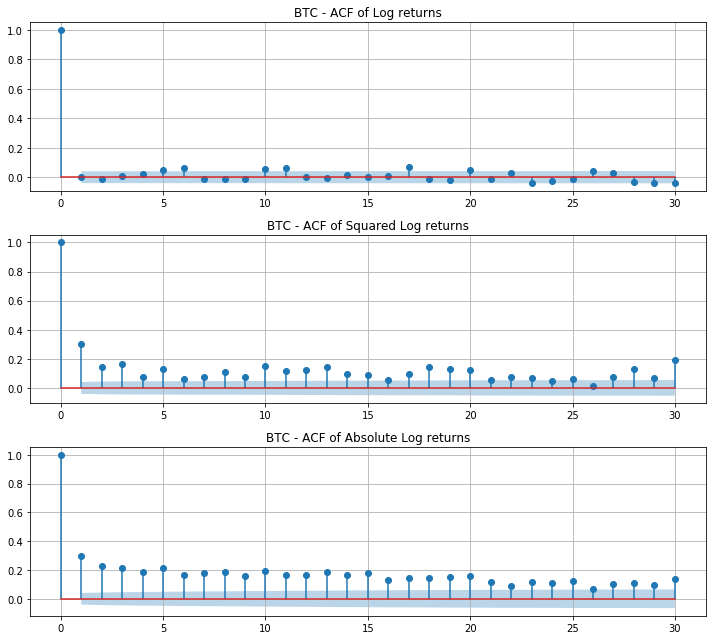

In [41]:
plot_real_acf(BTC.data['log_returns'], 'BTC','log_returns', savefig=True)

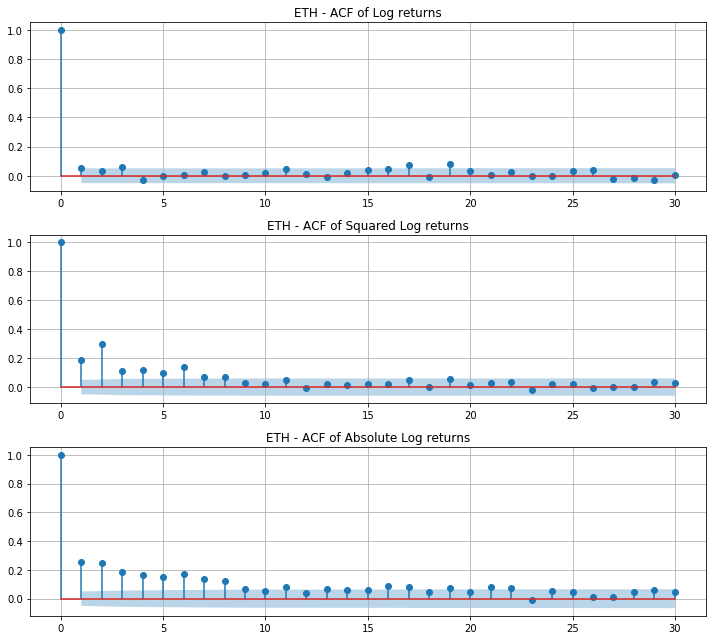

In [42]:
plot_real_acf(ETH.data['log_returns'], 'ETH','log_returns', savefig=True)

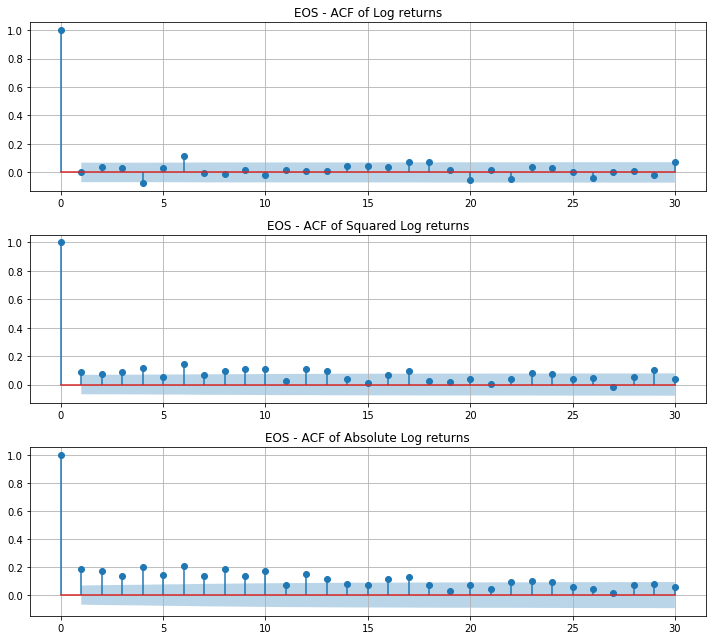

In [43]:
plot_real_acf(EOS.data['log_returns'], 'EOS','log_returns', savefig=True)

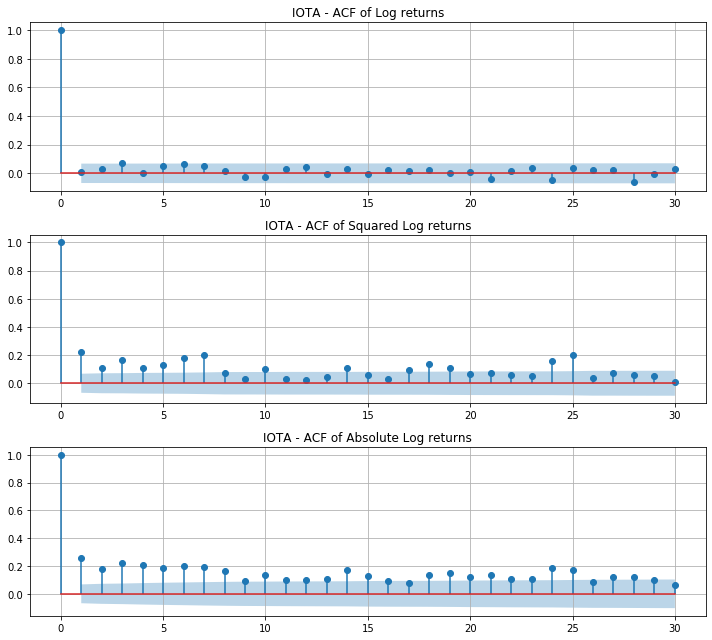

In [44]:
plot_real_acf(IOTA.data['log_returns'], 'IOTA','log_returns', savefig=True)